<a href="https://colab.research.google.com/github/kyjness/personal/blob/main/1%EC%B0%A8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#탐색적 데이터 분석


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_path = '/content/drive/MyDrive/쿠글/1차프로젝트 데이터/'

train = pd.read_csv(data_path + 'train.csv',index_col = 'id') #'id'를 인덱스로 만들기
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv',index_col = 'id')

KeyboardInterrupt: 

##데이터 둘러보기

In [ ]:
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [ ]:
#훈련,테스트 데이터 크기 확인
train.shape, test.shape

((3116945, 21), (2077964, 20))

In [ ]:
# train 데이터에서 'class' 열의 값을 'e'는 1, 'p'는 0으로 변경
train['class'] = train['class'].map({'e': 1, 'p': 0})
train['class'].head(6)

,class
id,
0,1
1,0
2,1
3,1
4,1
5,0


In [ ]:
#열이 많기 때문에 행과 열 바꿔주기
train.head().T

id,0,1,2,3,4
class,1,0,1,1,1
cap-diameter,8.8,4.51,6.94,3.88,5.85
cap-shape,f,x,f,f,x
cap-surface,s,h,s,y,l
cap-color,u,o,b,g,w
does-bruise-or-bleed,f,f,f,f,f
gill-attachment,a,a,x,s,d
gill-spacing,c,c,c,NaN,NaN
gill-color,w,n,w,g,w
stem-height,4.51,4.79,6.85,4.16,3.37


In [ ]:
test.head().T

id,3116945,3116946,3116947,3116948,3116949
cap-diameter,8.64,6.9,2.0,3.47,6.17
cap-shape,x,o,b,x,x
cap-surface,NaN,t,g,t,h
cap-color,n,o,n,n,y
does-bruise-or-bleed,t,f,f,f,f
gill-attachment,NaN,NaN,NaN,s,p
gill-spacing,NaN,c,c,c,NaN
gill-color,w,y,n,n,y
stem-height,11.13,1.27,6.18,4.98,6.73
stem-width,17.12,10.75,3.14,8.51,13.7


In [ ]:
submission.head()

,class
id,
3116945,e
3116946,e
3116947,e
3116948,e
3116949,e


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 523.2+ MB


고유값 의미

1.cap-shape (갓 모양)
bell = b
conical = c
convex = x
flat = f
knobbed = k
sunken = s

2.cap-surface (갓 표면)
fibrous = f
grooves = g
scaly = y
smooth = s

3.cap-color (갓 색상)
brown = n
buff = b
cinnamon = c
gray = g
green = r
pink = p
purple = u
red = e
white = w
yellow = y

4.bruises? (상처 여부)
bruises = t
no = f

5.odor (냄새)
almond = a
anise = l
creosote = c
fishy = y
foul = f
musty = m
none = n
pungent = p
spicy = s

6.gill-attachment (주름살 부착)
attached = a
descending = d
free = f
notched = n

7.gill-spacing (주름살 간격)
close = c
crowded = w
distant = d

8.gill-size (주름살 크기)
broad = b
narrow = n

9.gill-color (주름살 색상)
black = k
brown = n
buff = b
chocolate = h
gray = g
green = r
orange = o
pink = p
purple = u
red = e
white = w
yellow = y

10.stalk-shape (자루 모양)
enlarging = e
tapering = t

11.stalk-root (자루 뿌리)
bulbous = b
club = c
cup = u
equal = e
rhizomorphs = z
rooted = r
missing = ?

12.stalk-surface-above-ring (고리 위 자루 표면)
fibrous = f
scaly = y
silky = k
smooth = s

13.stalk-surface-below-ring (고리 아래 자루 표면)
fibrous = f
scaly = y
silky = k
smooth = s

14.stalk-color-above-ring (고리 위 자루 색상)
brown = n
buff = b
cinnamon = c
gray = g
orange = o
pink = p
red = e
white = w
yellow = y

15.stalk-color-below-ring (고리 아래 자루 색상)
brown = n
buff = b
cinnamon = c
gray = g
orange = o
pink = p
red = e
white = w
yellow = y

16.veil-type (덮개 유형)
partial = p
universal = u

17.veil-color (덮개 색상)
brown = n
orange = o
white = w
yellow = y

18.ring-number (고리 개수)
none = n
one = o
two = t

19.ring-type (고리 유형)
cobwebby = c
evanescent = e
flaring = f
large = l
none = n
pendant = p
sheathing = s
zone = z

20.spore-print-color (포자 인쇄 색상)
black = k
brown = n
buff = b
chocolate = h
green = r
orange = o
purple = u
white = w
yellow = y

21.population (분포)
abundant = a
clustered = c
numerous = n
scattered = s
several = v
solitary = y

22.habitat (서식지)
grasses = g
leaves = l
meadows = m
paths = p
urban = u
waste = w
woods = d

결측값 확인

In [ ]:
train.isna().sum()

,0
class,0
cap-diameter,4
cap-shape,40
cap-surface,671023
cap-color,12
does-bruise-or-bleed,8
gill-attachment,523936
gill-spacing,1258435
gill-color,57
stem-height,0


In [ ]:
#한글 폰트 설치 및 불러오기
!pip install koreanize-matplotlib

import koreanize_matplotlib

<Axes: >

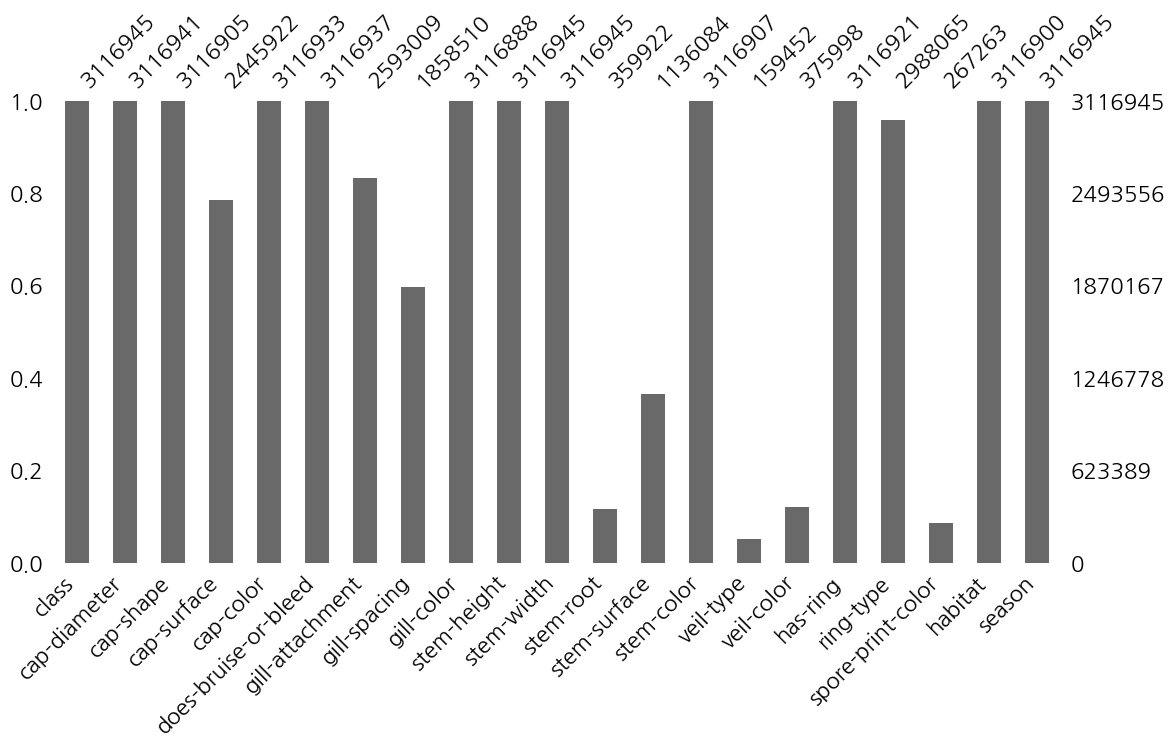

In [ ]:
import numpy as np
import missingno as msno

msno.bar(df = train,figsize=(13,6))

<Axes: >

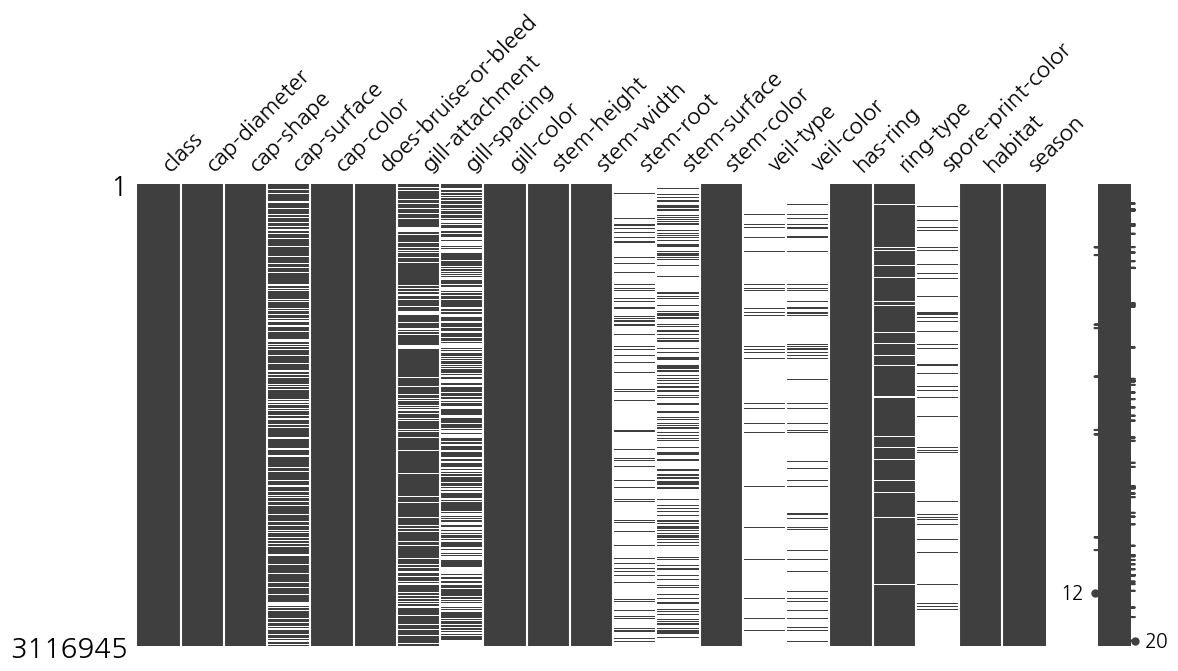

In [ ]:
msno.matrix(df = train,figsize=(13,6))

##데이터 시각화

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

결측값이 많은 column제거

In [ ]:
train.drop(columns=[
    'cap-surface',
    'gill-spacing',
    'stem-root', 'veil-type', 'veil-color', 'spore-print-color' ,
    'stem-surface'
], inplace=True)

In [ ]:
test.drop(columns=[
    'cap-surface',
    'gill-spacing',
    'stem-root',
    'stem-surface' ,'veil-type', 'veil-color', 'spore-print-color'
], inplace=True)

피처요약표

In [ ]:
from sys import is_finalizing
#피처 요약표
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns = {'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고유값 개수'] = df.nunique().values
  summary['데이터 종류']= None
  for col in df.columns:
    if df[col].nunique() == 2:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '이진형'
    elif df[col].dtype == 'object':
      summary.loc[summary['피처'] == col, '데이터 종류'] = '범주형'
    else:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '연속형'
  return summary

resumetable(train)

데이터셋 형상: (3116945, 14)


,피처,데이터 타입,결측값 개수,고유값 개수,데이터 종류
0,class,int64,0,2,이진형
1,cap-diameter,float64,4,3913,연속형
2,cap-shape,object,40,74,범주형
3,cap-color,object,12,78,범주형
4,does-bruise-or-bleed,object,8,26,범주형
5,gill-attachment,object,523936,78,범주형
6,gill-color,object,57,63,범주형
7,stem-height,float64,0,2749,연속형
8,stem-width,float64,0,5836,연속형
9,stem-color,object,38,59,범주형


In [ ]:
summary = resumetable(train)

데이터셋 형상: (3116945, 14)


빈도 낮은 것 제외

In [ ]:
categorical_columns = summary[summary['데이터 종류']=='범주형'].피처

In [ ]:
#빈도 낮은 것 unknown으로 대체
def replace_infrequent_categories(df, column, threshold=70):
    value_counts = df[column].value_counts()
    infrequent = value_counts[value_counts <= threshold].index
    df[column] = df[column].apply(lambda x: "Unknown" if x in infrequent else x)
    return df

# 범주형 피처 handling
for col in categorical_columns:
    train_cleaned = replace_infrequent_categories(train, col)

# unique 컬럼 확인
resumetable(train_cleaned)

데이터셋 형상: (3116945, 14)


,피처,데이터 타입,결측값 개수,고유값 개수,데이터 종류
0,class,int64,0,2,이진형
1,cap-diameter,float64,4,3913,연속형
2,cap-shape,object,40,8,범주형
3,cap-color,object,12,13,범주형
4,does-bruise-or-bleed,object,8,3,범주형
5,gill-attachment,object,523936,9,범주형
6,gill-color,object,57,13,범주형
7,stem-height,float64,0,2749,연속형
8,stem-width,float64,0,5836,연속형
9,stem-color,object,38,14,범주형


train데이터의 e(1)와 p(0) 비율

Text(0.5, 1.0, 'Class Distribution')

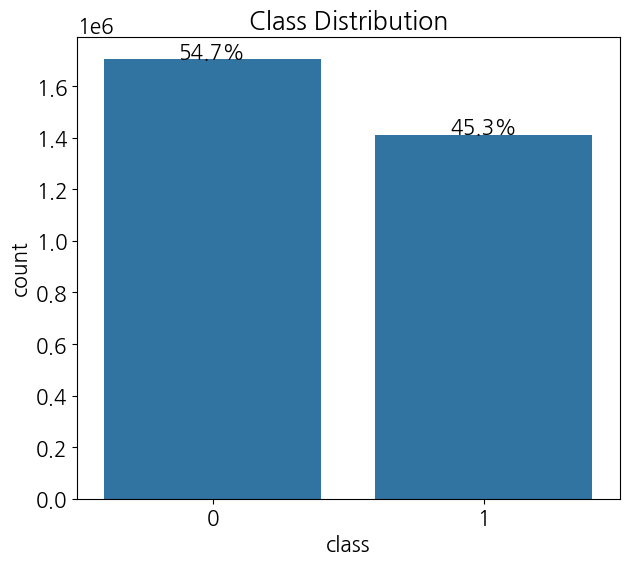

In [ ]:
def write_percent(ax,total_size):
  for patch in ax.patches:
    height = patch.get_height() #도형 높이(데이터 개수)
    width = patch.get_width() #도형 너비
    left_coord = patch.get_x() #도형 왼쪽 테두리의 x축 위치
    percent = height/total_size*100 #타깃값 비율

    #(x,y) 좌표에 텍스트 입력
    ax.text(left_coord + width/2.0, #x축 위치
              height + total_size*0.001, #y축 위치
              '{:1.1f}%'.format(percent), #입력 텍스트
              ha='center') #가운데 정렬
mpl.rc('font',size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='class',data=train_cleaned)
write_percent(ax,len(train)) #비율 표시
ax.set_title('Class Distribution')

이진 피처 - 고윳값별 타깃값 1 비율을 막대 그래프로 그리기

In [ ]:
import matplotlib.gridspec as gridspec

def plot_class_ratio_by_features(df,columns,num_rows,num_cols,size):
  mpl.rc('font',size=9)
  plt.figure(figsize=size) #전체 Figure 크기 설정
  grid = gridspec.GridSpec(num_rows,num_cols) #서브플롯 배치
  plt.subplots_adjust(wspace=0.3,hspace=0.3) #서브플롯 좌우/상하 여백 설정

  for idx, column in enumerate(columns):
        ax = plt.subplot(grid[idx])

        # 비율로 막대 그래프 그리기
        sns.barplot(x=column, y='class', data=df, palette='Set2', ax=ax)

  plt.show()

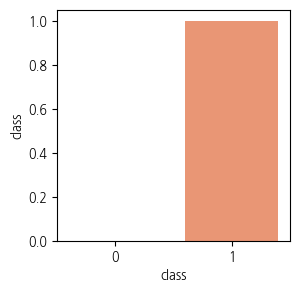

In [ ]:
bin_features = summary[summary['데이터 종류']=='이진형'].피처 #이진 피처
plot_class_ratio_by_features(train_cleaned,bin_features,1,1,size=(3,3))

범주형 피처 - 고윳값별 타깃값 1 비율을 막대 그래프로 그리기

In [ ]:
train_copy = train_cleaned.copy()

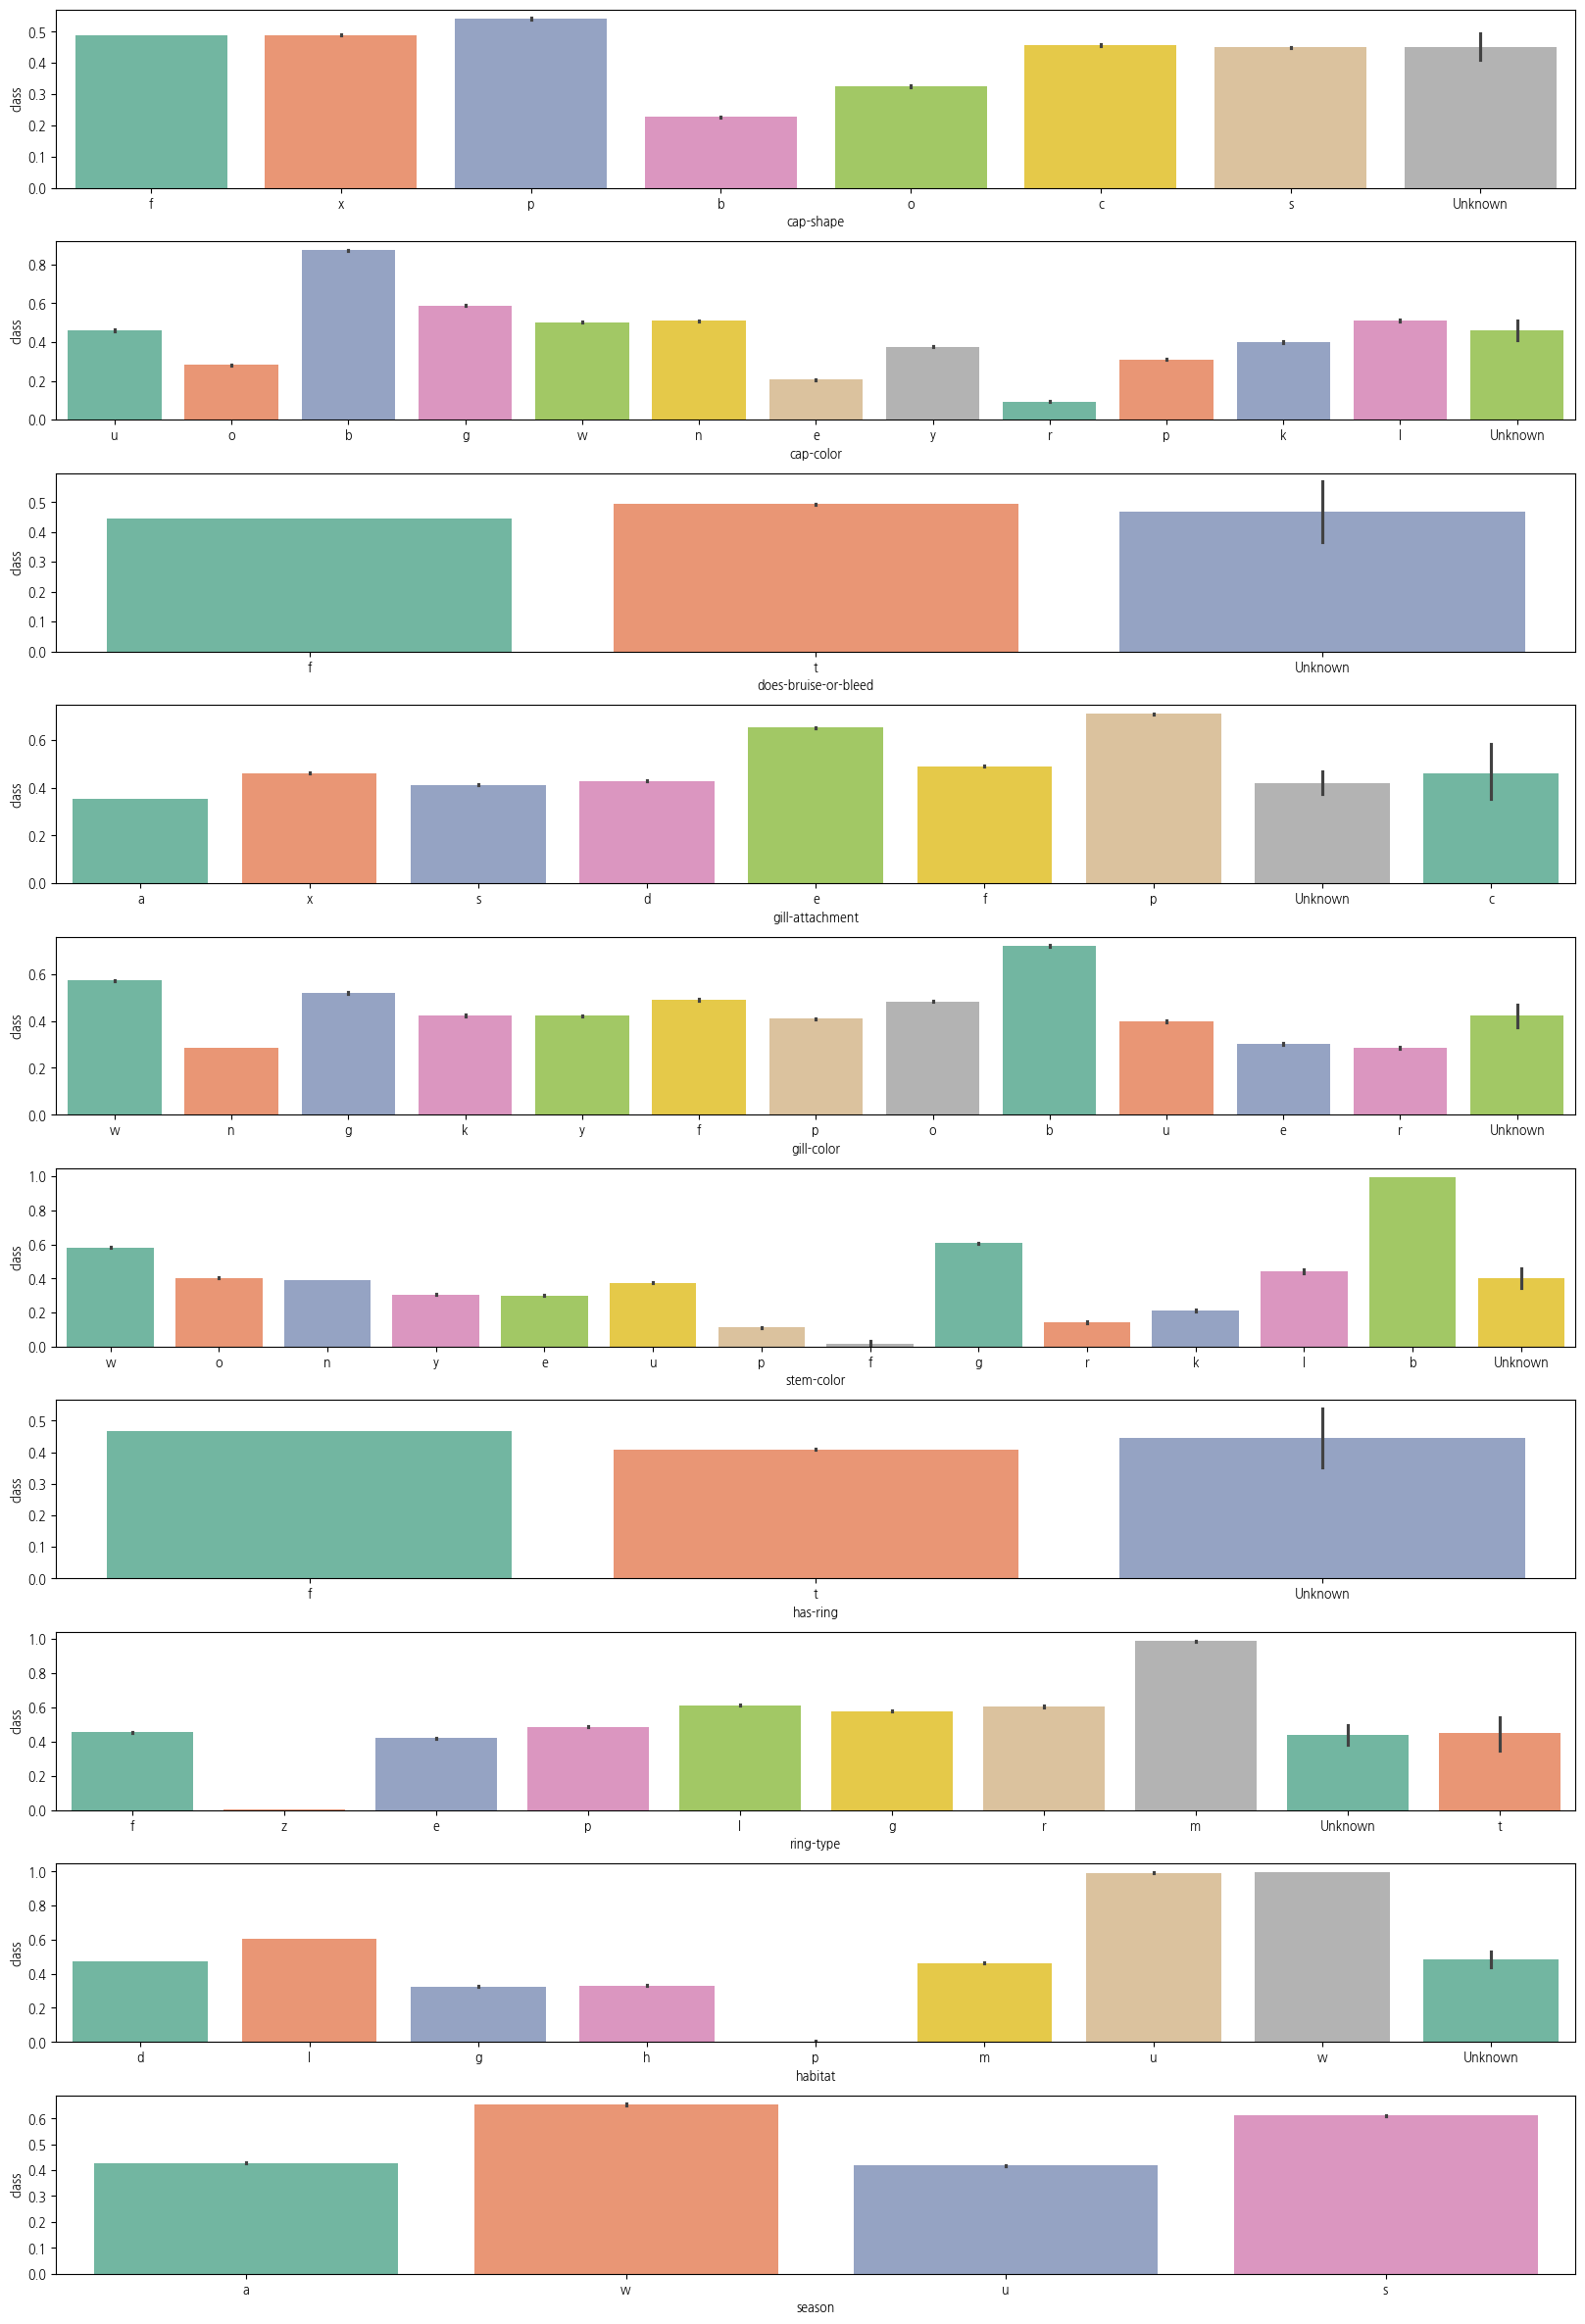

In [ ]:
cat_features = summary[summary['데이터 종류']=='범주형'].피처 #범주형 피처

plot_class_ratio_by_features(train_copy,cat_features,10,1,size=(20,30))

연속형 피처 - 구간별 타깃값 1 비율을 막대 그래프로 그리기

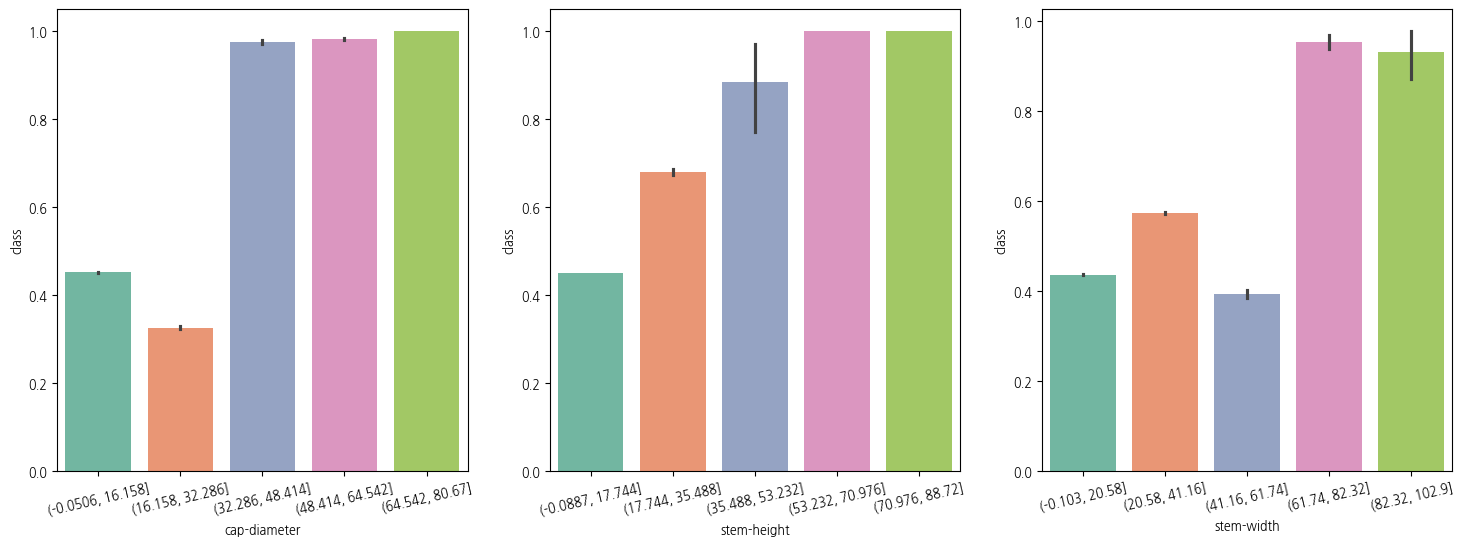

In [ ]:
cont_features = summary[summary['데이터 종류']=='연속형'].피처 #연속형 피처

plt.figure(figsize=(18, 6)) #Figure 크기 설정
grid = gridspec.GridSpec(1,3) #GriSpec 객체 생성
plt.subplots_adjust(wspace=0.2,hspace=0.4) #서브플롯 간 여백 설정

for idx, cont_feature in enumerate(cont_features):
  #값을 5개 구간으로 나누기
  train_copy[cont_feature] = pd.cut(train_copy[cont_feature],5)

  ax = plt.subplot(grid[idx]) #분포도를 그릴 서브플롯 설정
  sns.barplot(x=cont_feature,y='class',data=train_copy,palette='Set2',ax=ax)
  ax.tick_params(axis='x',labelrotation=13) #x축 라벨 회전


<Axes: >

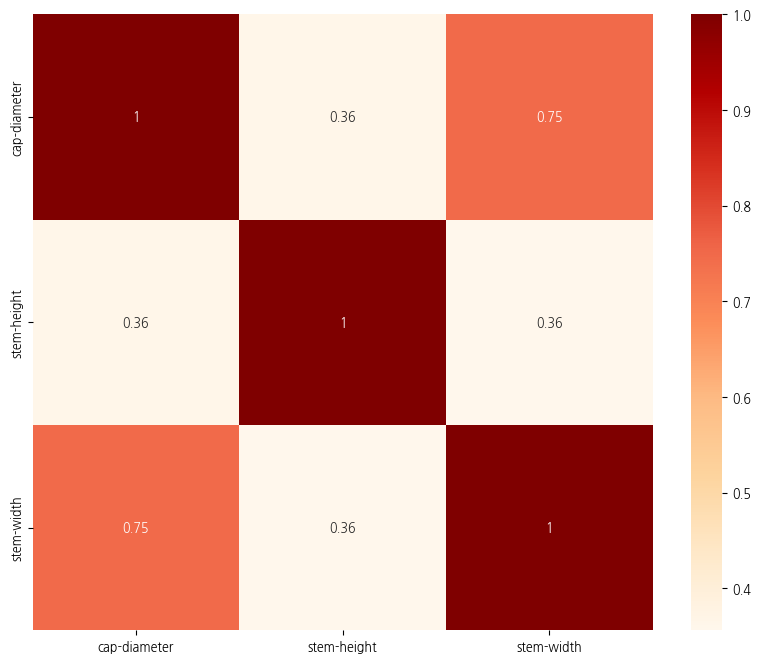

In [ ]:
#히트맵
plt.figure(figsize=(10,8))
cont_corr = train[cont_features].corr() #연속형 피처 간 상관관계
sns.heatmap(cont_corr,annot=True,cmap='OrRd') #히트맵 그리기

#베이스라인 모델

In [ ]:
import numpy as np
import pandas as pd
import os
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/쿠글/1차프로젝트 데이터/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')
test_id=test['id']

train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

train['class'] = train['class'].map({'e': 1, 'p': 0})

##피처 엔지니어링

결측값이 많은 column제거

In [ ]:
train.drop(columns=[
    'cap-surface',
    'gill-spacing',
    'stem-root', 'veil-type', 'veil-color', 'spore-print-color' ,
    'stem-surface'
], inplace=True)

In [ ]:
test.drop(columns=[
    'cap-surface',
    'gill-spacing',
    'stem-root',
    'stem-surface' ,'veil-type', 'veil-color', 'spore-print-color'
], inplace=True)

나머지 column의 결측값들은 중아값,최빈값으로 대체

In [ ]:
train['cap-diameter'].fillna(train['cap-diameter'].median(), inplace=True)
train['cap-shape'].fillna(train['cap-shape'].mode()[0], inplace=True)
train['cap-color'].fillna(train['cap-color'].mode()[0], inplace=True)
train['does-bruise-or-bleed'].fillna('no', inplace=True)
train['gill-attachment'].fillna(train['gill-attachment'].mode()[0], inplace=True)
train['gill-color'].fillna(train['gill-color'].mode()[0], inplace=True)
train['stem-color'].fillna(train['stem-color'].mode()[0], inplace=True)
train['has-ring'].fillna(train['has-ring'].mode()[0], inplace=True)
train['ring-type'].fillna(train['ring-type'].mode()[0], inplace=True)
train['habitat'].fillna(train['habitat'].mode()[0], inplace=True)

In [ ]:
test['cap-diameter'].fillna(test['cap-diameter'].median(), inplace=True)
test['cap-shape'].fillna(test['cap-shape'].mode()[0], inplace=True)
test['cap-color'].fillna(test['cap-color'].mode()[0], inplace=True)
test['does-bruise-or-bleed'].fillna('no', inplace=True)
test['gill-attachment'].fillna(test['gill-attachment'].mode()[0], inplace=True)
test['gill-color'].fillna(test['gill-color'].mode()[0], inplace=True)
test['stem-color'].fillna(test['stem-color'].mode()[0], inplace=True)
test['has-ring'].fillna(test['has-ring'].mode()[0], inplace=True)
test['ring-type'].fillna(test['ring-type'].mode()[0], inplace=True)
test['habitat'].fillna(test['habitat'].mode()[0], inplace=True)

In [ ]:
train.shape,test.shape

((3116945, 14), (2077964, 13))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-color            object 
 7   stem-height           float64
 8   stem-width            float64
 9   stem-color            object 
 10  has-ring              object 
 11  ring-type             object 
 12  habitat               object 
 13  season                object 
dtypes: float64(3), int64(1), object(10)
memory usage: 332.9+ MB


피처 요약표 - 결측값 0 인 것 확인

In [ ]:
from sys import is_finalizing

def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns = {'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고유값 개수'] = df.nunique().values
  summary['데이터 종류']= None
  for col in df.columns:
    if df[col].nunique() == 2:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '이진형'
    elif df[col].dtype == 'object':
      summary.loc[summary['피처'] == col, '데이터 종류'] = '범주형'
    else:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '연속형'
  return summary

resumetable(train)

데이터셋 형상: (3116945, 14)


,피처,데이터 타입,결측값 개수,고유값 개수,데이터 종류
0,class,int64,0,2,이진형
1,cap-diameter,float64,0,3913,연속형
2,cap-shape,object,0,74,범주형
3,cap-color,object,0,78,범주형
4,does-bruise-or-bleed,object,0,27,범주형
5,gill-attachment,object,0,78,범주형
6,gill-color,object,0,63,범주형
7,stem-height,float64,0,2749,연속형
8,stem-width,float64,0,5836,연속형
9,stem-color,object,0,59,범주형


데이터 시각화

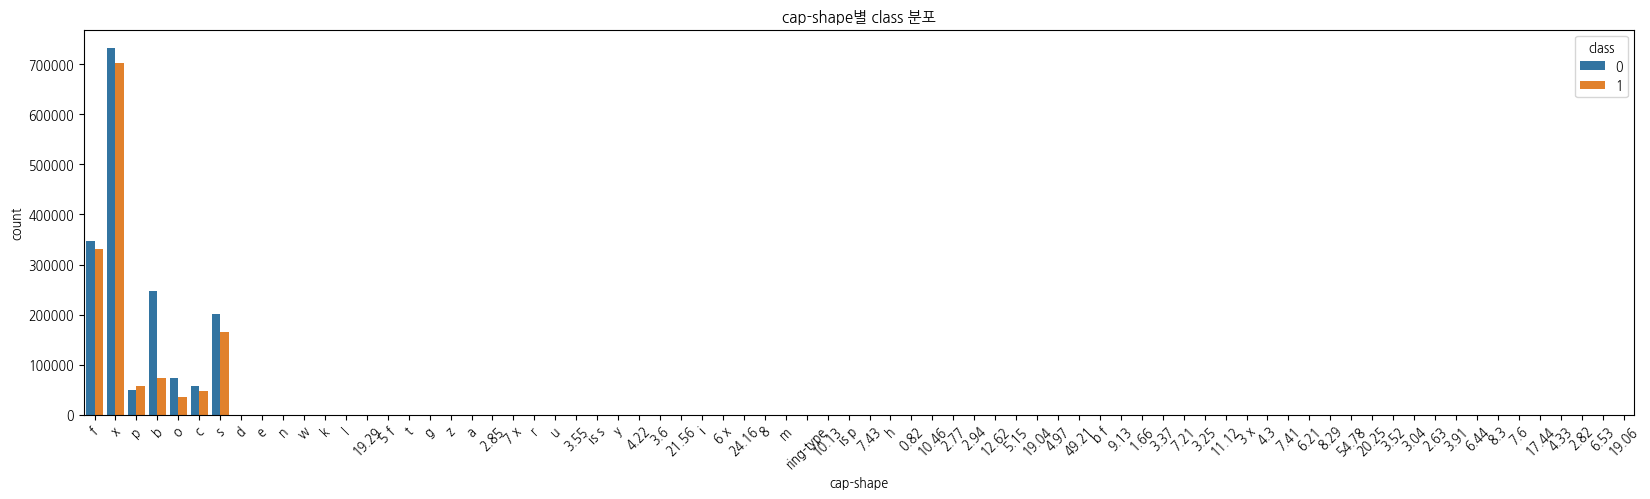

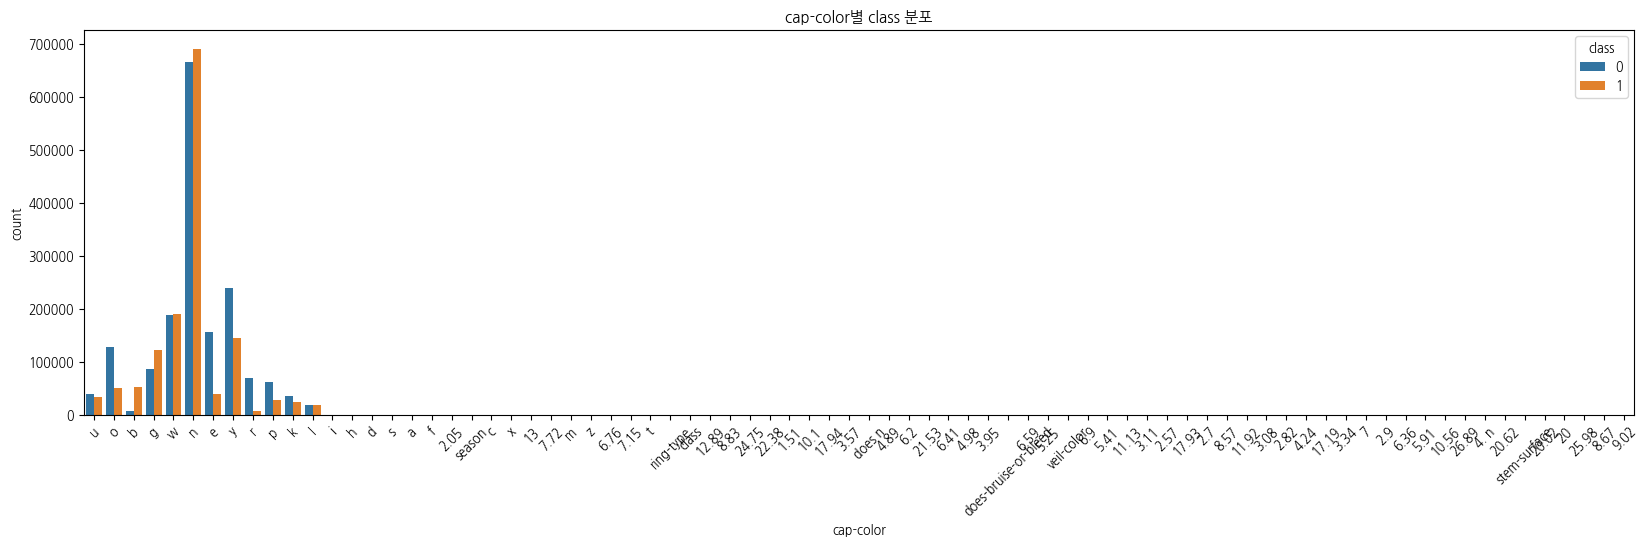

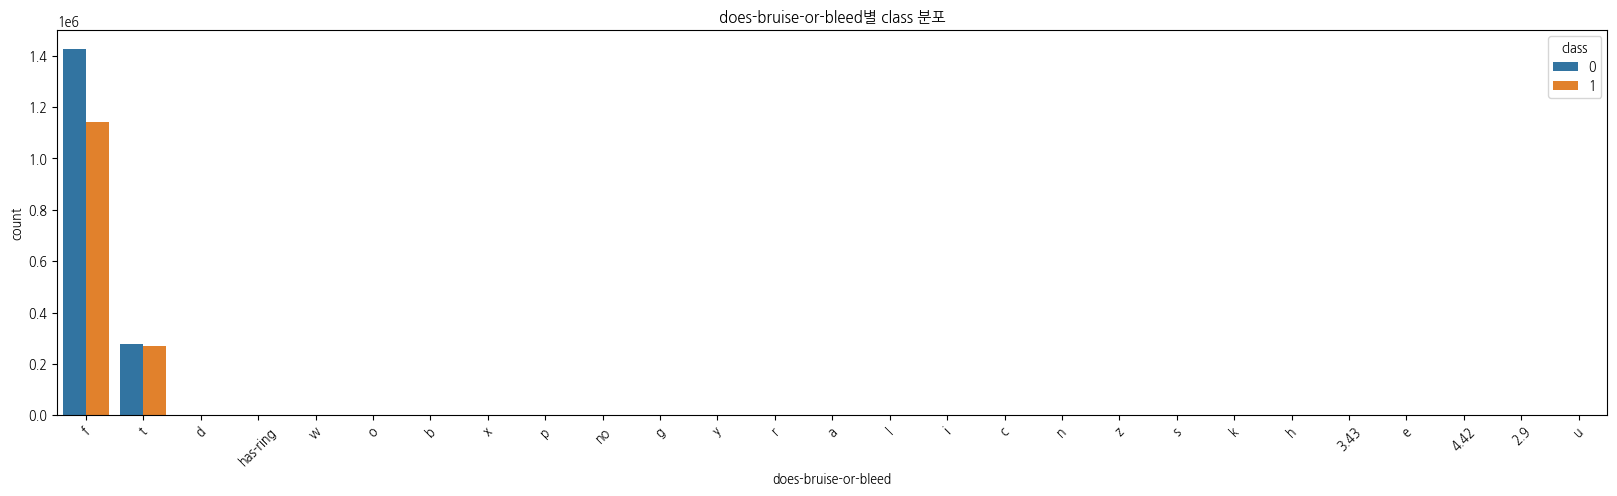

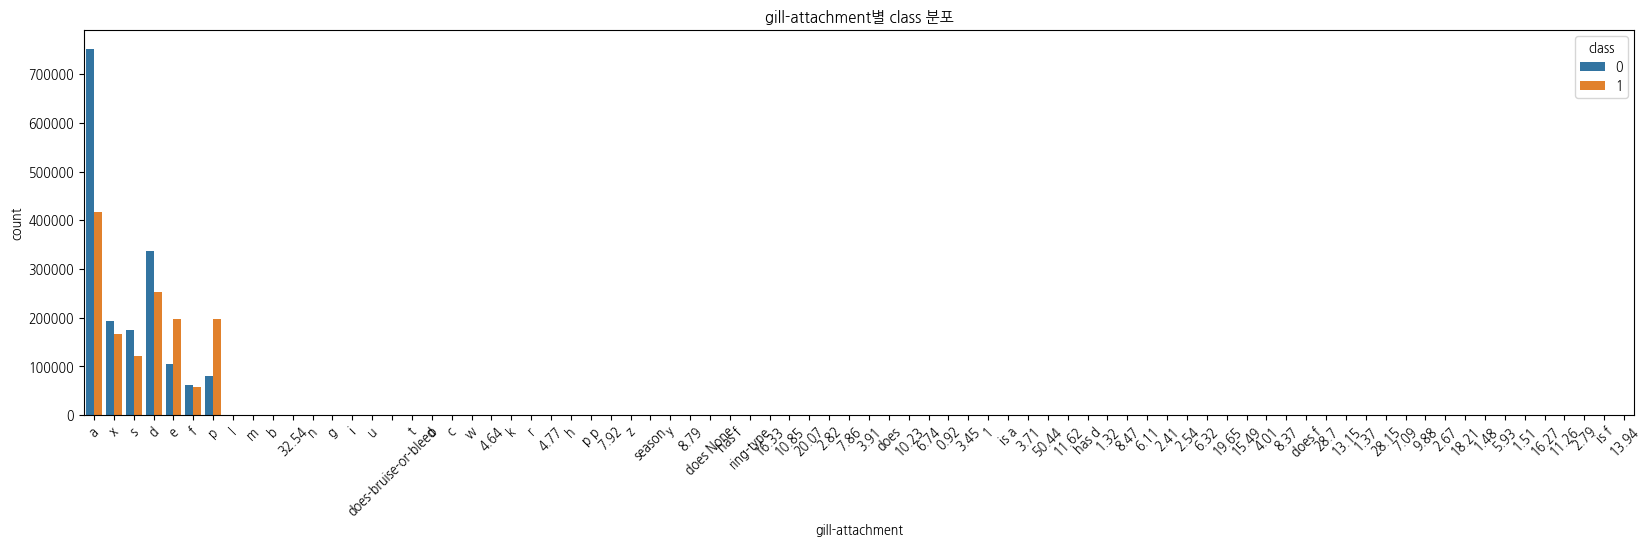

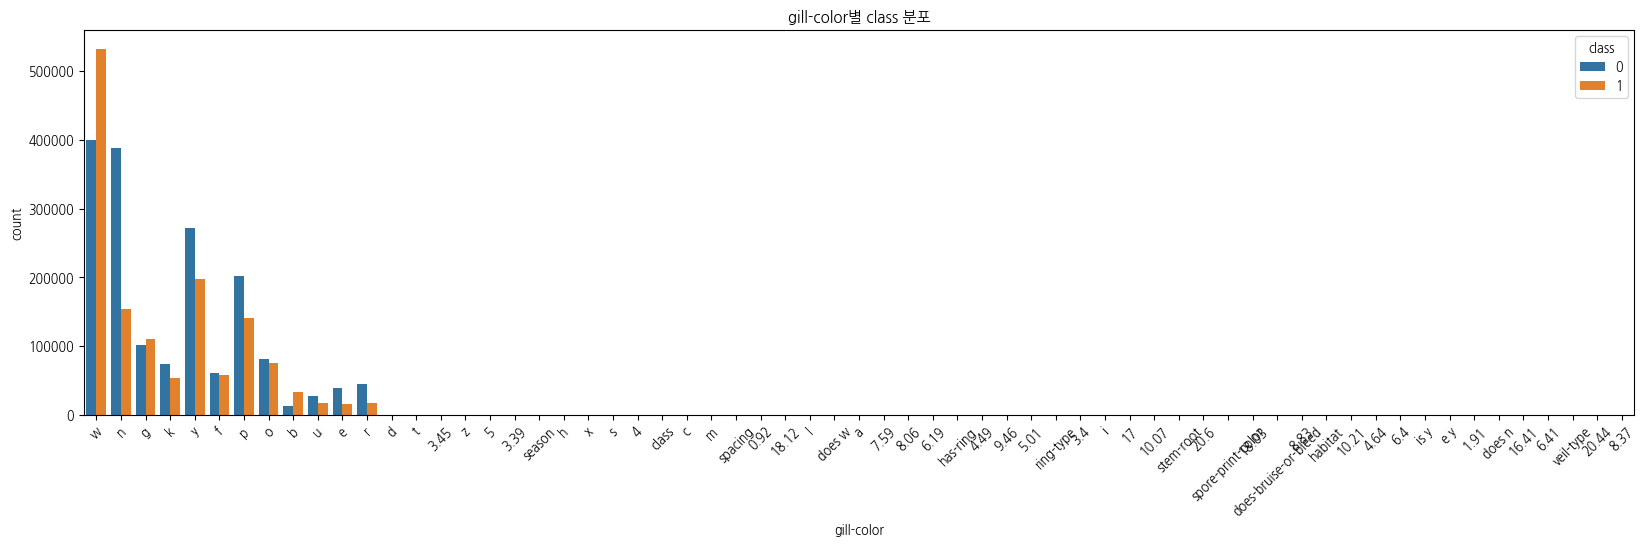

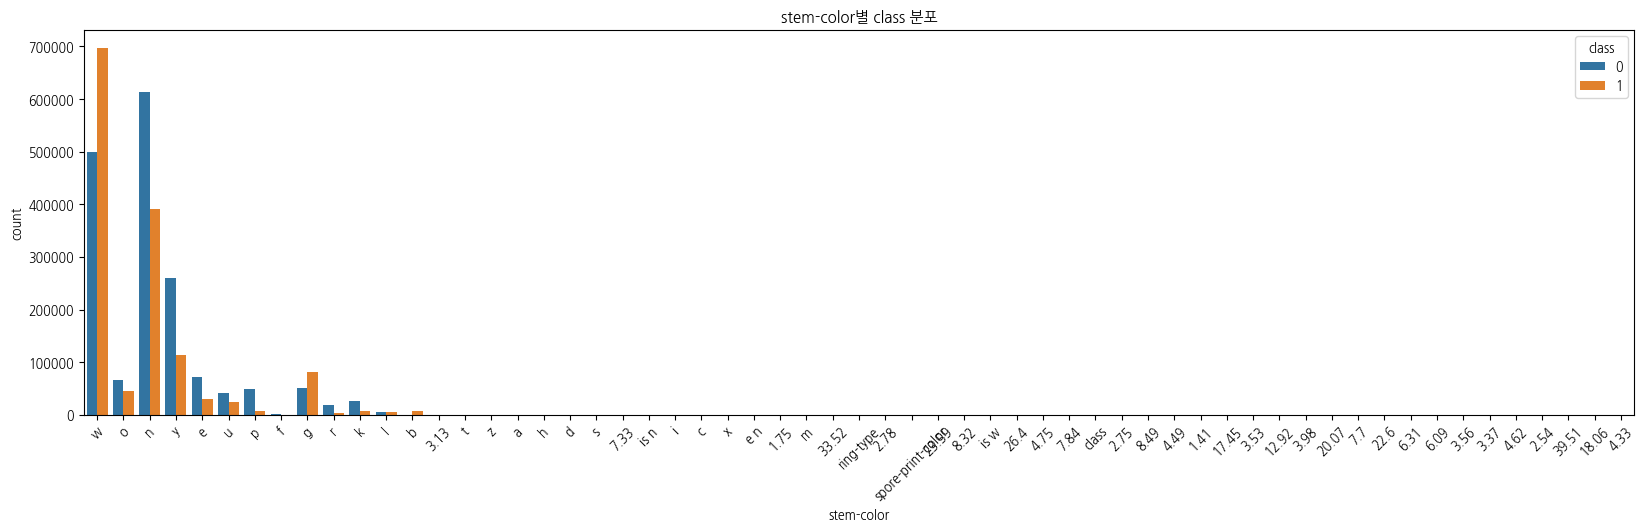

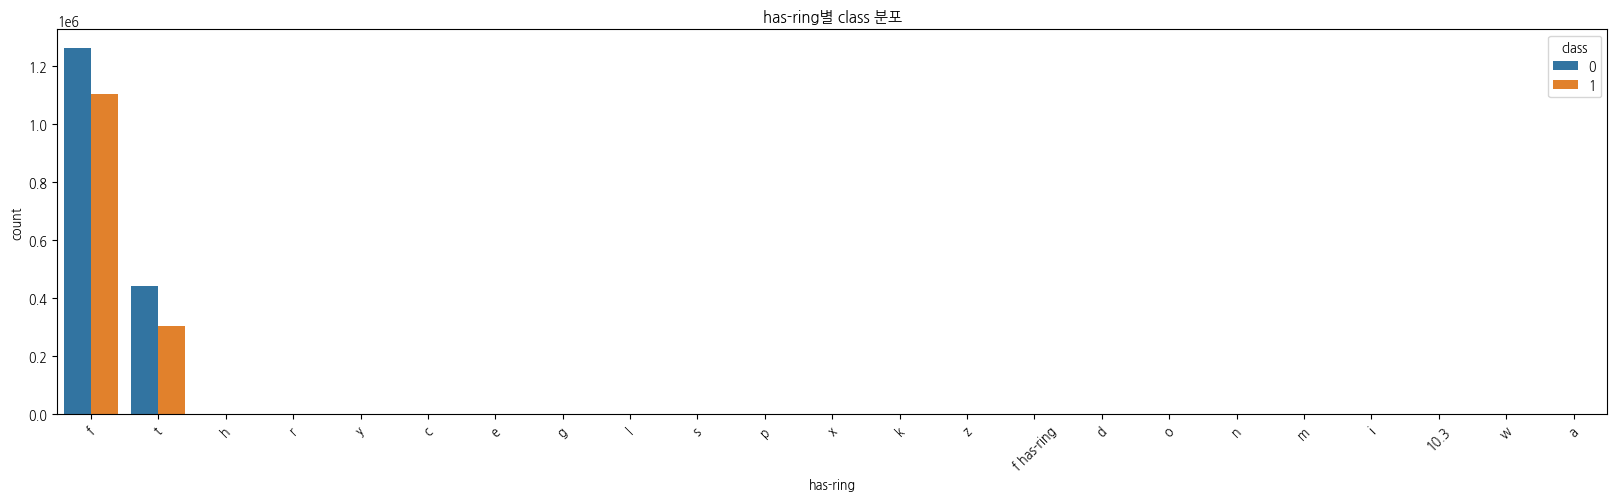

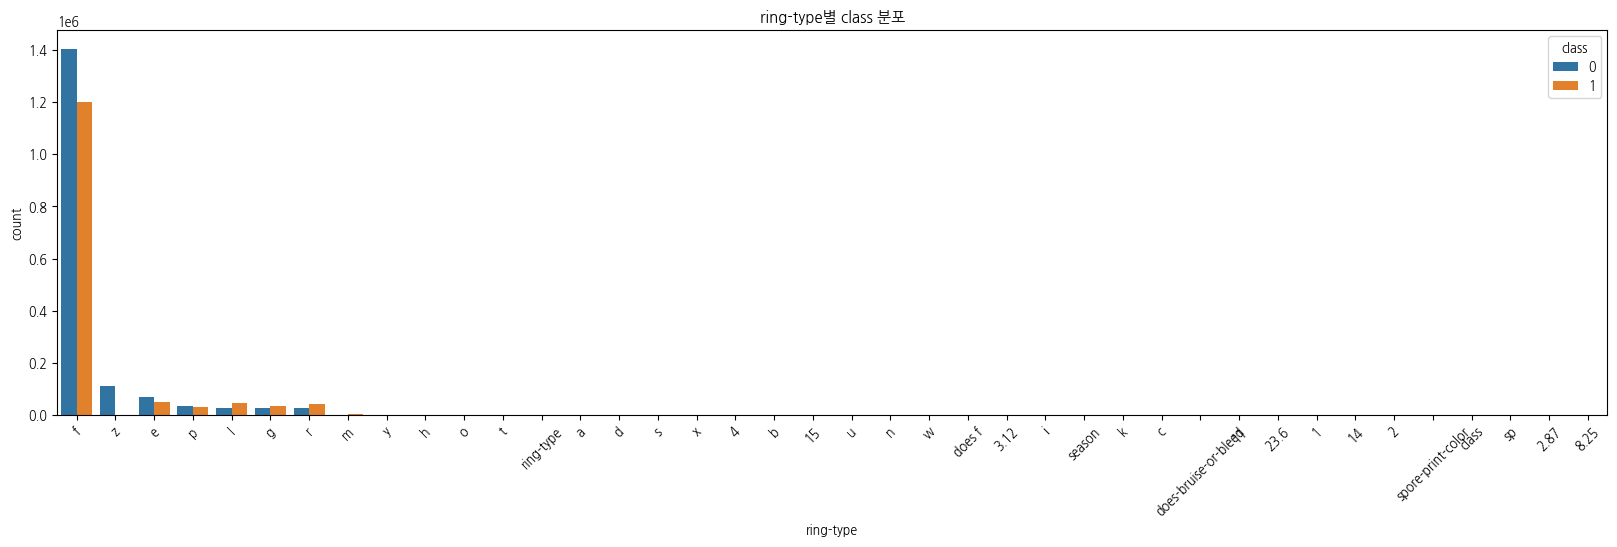

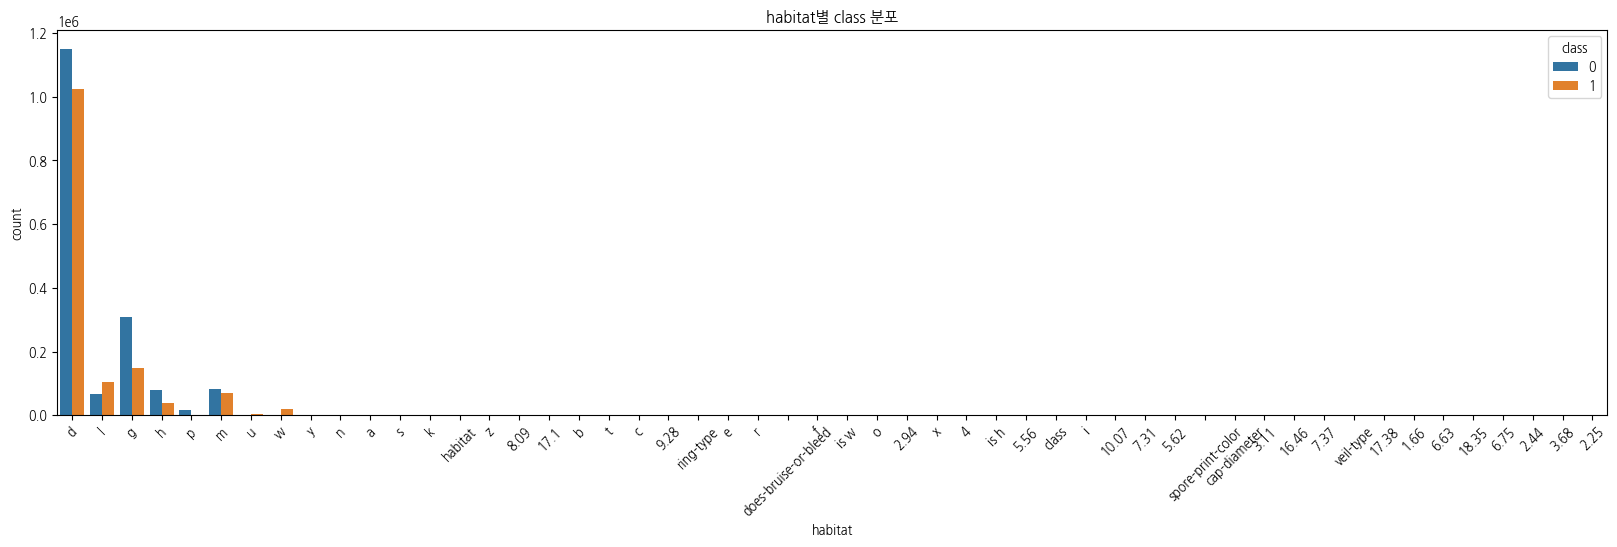

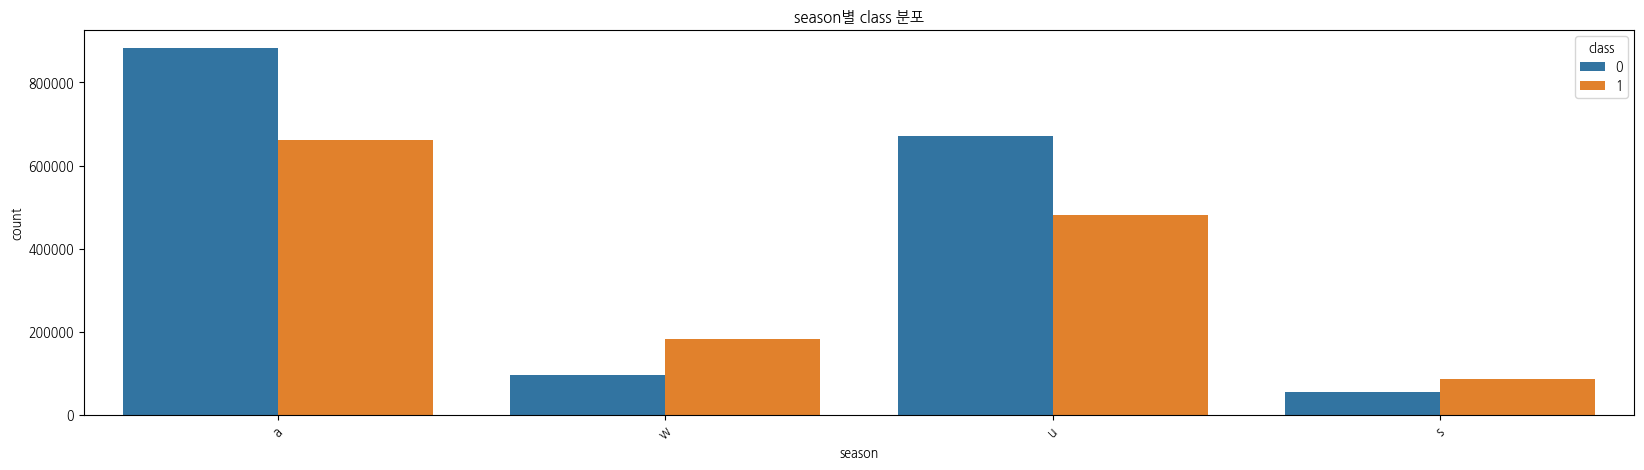

In [ ]:
# 범주형 피처 시각화 (Countplot)
for col in train.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(20, 5))
  sns.countplot(x=col, hue='class', data=train)
  plt.title(f'{col}별 class 분포')
  plt.xticks(rotation=45)
  plt.show()

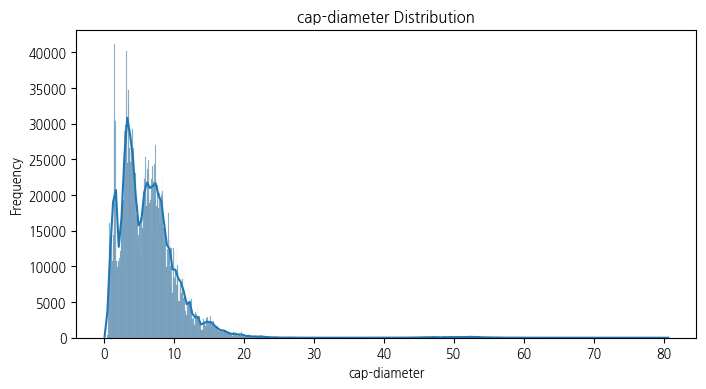

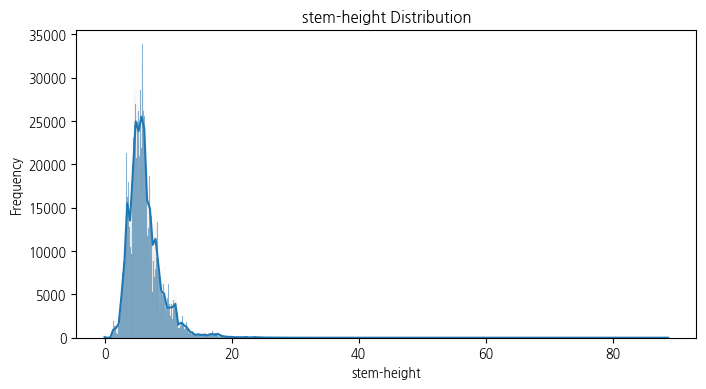

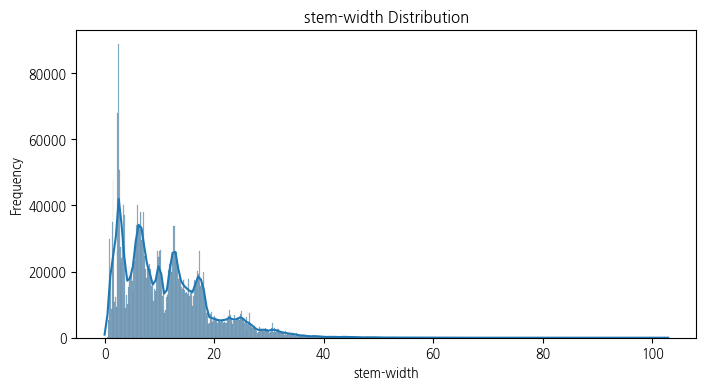

In [ ]:
# 연속형 피처 - 히스토그램으로 분포 확인
cont_features = summary[summary['데이터 종류']=='연속형'].피처

for feature in cont_features:
  plt.figure(figsize=(8, 4))
  sns.histplot(train[feature], kde=True)
  plt.title(f'{feature} Distribution')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

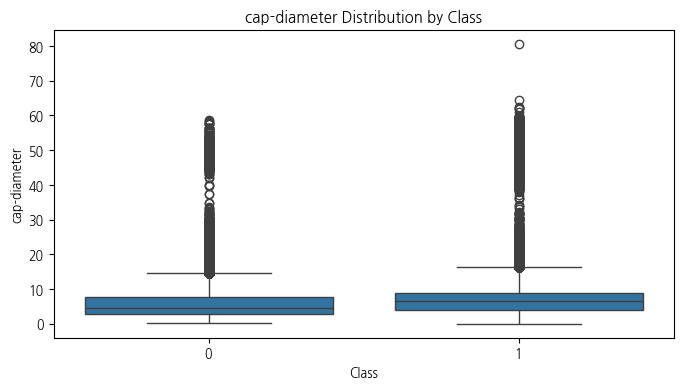

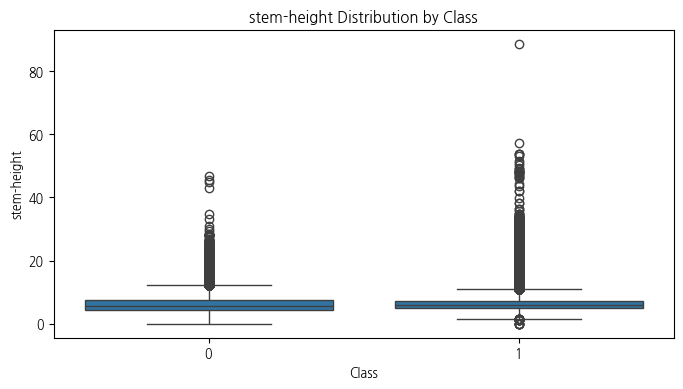

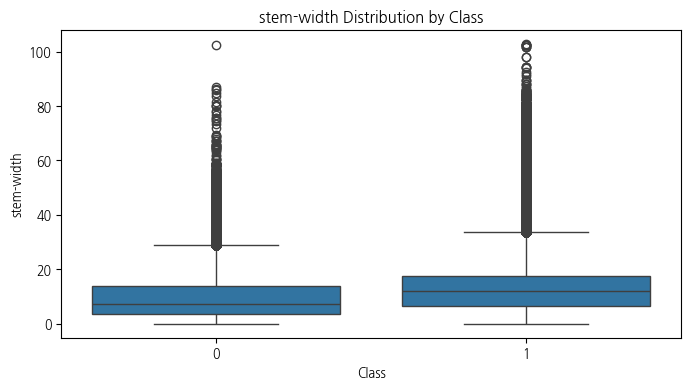

In [ ]:
# 연속형 피처 - class별 박스플롯으로 분포 비교
for feature in cont_features:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x='class', y=feature, data=train)
  plt.title(f'{feature} Distribution by Class')
  plt.xlabel('Class')
  plt.ylabel(feature)
  plt.show()

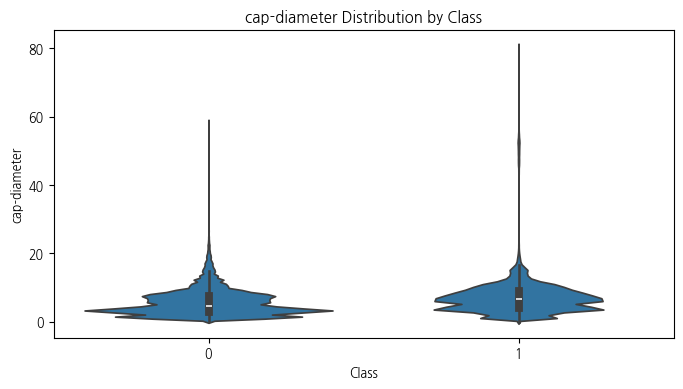

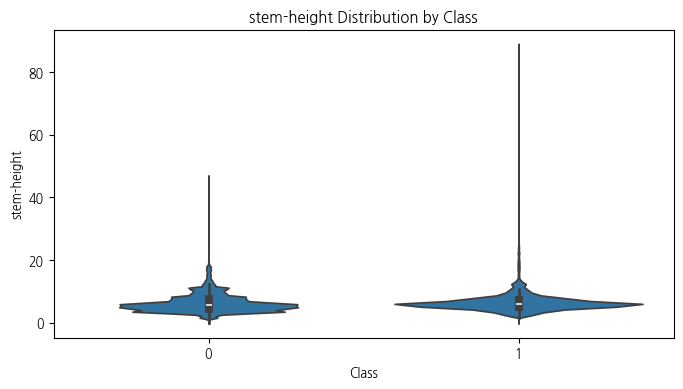

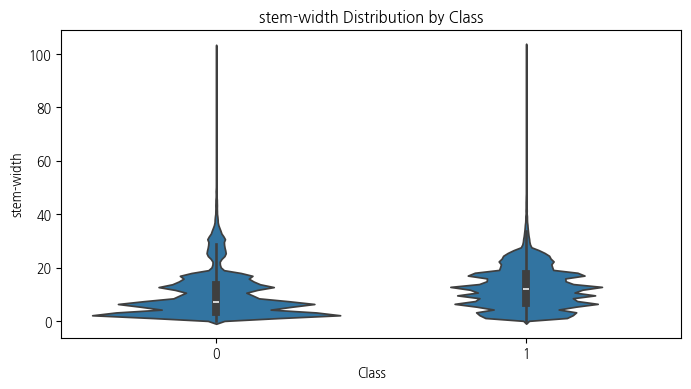

In [ ]:
# 연속형 피처 - class별 바이올린플롯으로 분포 비교
for feature in cont_features:
  plt.figure(figsize=(8, 4))
  sns.violinplot(x='class', y=feature, data=train)
  plt.title(f'{feature} Distribution by Class')
  plt.xlabel('Class')
  plt.ylabel(feature)
  plt.show()

labelencoding

In [ ]:
def encode_features(df, label_encoders=None):
    if label_encoders is None:
        label_encoders = {}

    categorical_features = df.select_dtypes(include=['object']).columns
    for column in categorical_features:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

train, label_encoders = encode_features(train)

test, _ = encode_features(test, label_encoders)

In [ ]:
train.shape,test.shape

((3116945, 14), (2077964, 13))

In [ ]:
train.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,8.80,53,72,8,44,59,4.51,15.39,55,5,18,25,0
1,0,4.51,71,64,8,44,46,4.79,6.48,47,18,39,25,3
2,1,6.94,53,49,8,75,59,6.85,9.93,46,5,18,36,3
3,1,3.88,53,57,8,70,37,4.16,6.53,55,5,18,25,2
4,1,5.85,71,74,8,47,59,3.37,8.36,55,5,18,29,0


##모델 훈련 및 성능 검증 - randomforest

In [ ]:
from sklearn.metrics import  classification_report
from sklearn.model_selection import train_test_split

x = train.drop('class', axis=1)
y = train['class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)

In [ ]:
model

RandomForestClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    340992
           1       0.98      0.99      0.99    282397

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    340992
           1       0.98      0.99      0.99    282397

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



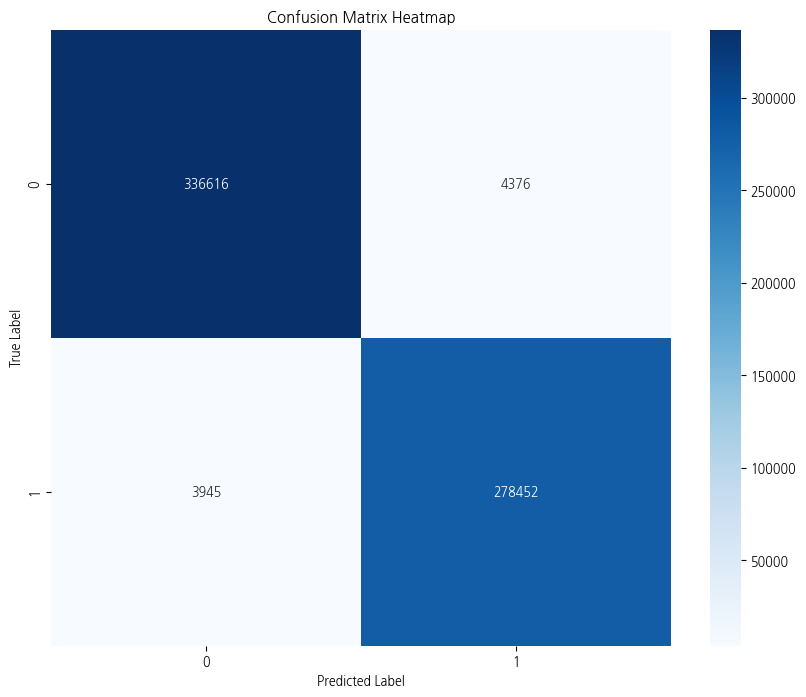

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = np.unique(y)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
np.array(y_pred)[:109]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
test.shape,train.shape

((2077964, 13), (3116945, 14))

In [ ]:
test['stem-height']=test['stem-height'].fillna(5.24)

In [ ]:
test.isna().sum()

,0
cap-diameter,0
cap-shape,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
has-ring,0


In [ ]:
test_prediction = model.predict(test)

In [ ]:
np.array(test_prediction)[:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
submission.head()

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


In [ ]:
print(len(test_prediction))
print(test_id.max)

2077964
<bound method Series.max of 0          3116945
1          3116946
2          3116947
3          3116948
4          3116949
            ...   
2077959    5194904
2077960    5194905
2077961    5194906
2077962    5194907
2077963    5194908
Name: id, Length: 2077964, dtype: int64>


##예측 및 결과 제출

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
score = matthews_corrcoef(y_test, y_pred)
print('MCC:', score)

MCC: 0.9730705068395885


In [ ]:
submission['class']=test_prediction
submission['id']=test_id
submission['class']=submission['class'].map({1:'e',0:'p'})
submission.to_csv('predd.csv',index=False)

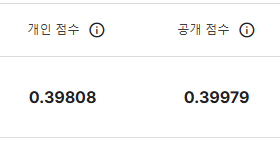

##다른 알고리즘

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier",
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")

    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")

    return metrics.drop("Model", axis=1)

In [ ]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[511628      0]
 [423455      1]]
LogisticRegression()  modeli eğitiliyor!..
[[370964 140664]
 [227164 196292]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[499792  11836]
 [ 11951 411505]]
RandomForestClassifier()  modeli eğitiliyor!..
[[505100   6528]
 [  5967 417489]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[469629  41999]
 [ 58495 364961]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[503993   7635]
 [  6551 416905]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[415063  96565]
 [110340 313116]]
MultinomialNB()  modeli eğitiliyor!..
[[344352 167276]
 [196484 226972]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[505100   6528]
 [  5967 417489]]
classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    511628
           1       0.98      0.99      0.99    423456

    accuracy                       

,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.986638,0.986638,0.986638,0.986638
KNeighborsClassifier,0.984829,0.984829,0.984829,0.984829
DecisionTreeClassifier,0.974562,0.974562,0.974562,0.974562
GradientBoostingClassifier,0.892529,0.892529,0.892529,0.892529
AdaBoostClassifier,0.778731,0.778731,0.778731,0.778731
MultinomialNB,0.610987,0.610987,0.610987,0.610987
LogisticRegression,0.606636,0.606636,0.606636,0.606636
BernoulliNB,0.547148,0.547148,0.547148,0.547148


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    340992
           1       0.98      0.99      0.99    282397

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



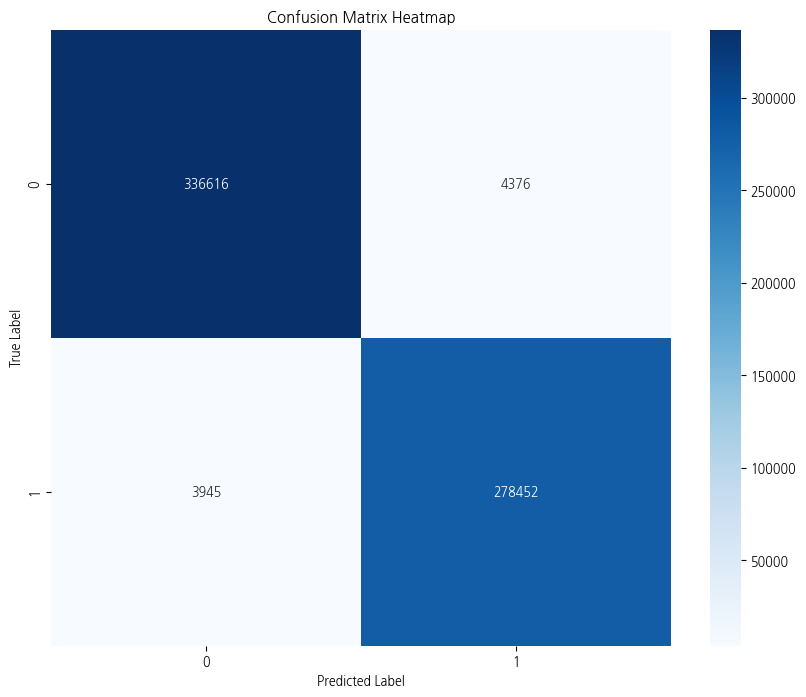

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = np.unique(y)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#성능 개선 - LightGBM 모델

In [ ]:
import numpy as np
import pandas as pd
import os
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/쿠글/1차프로젝트 데이터/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')
test_id=test['id']

train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

train['class'] = train['class'].map({'e': 1, 'p': 0})

##피처 엔지니어링

결측값이 많은 column제거

In [ ]:
train.drop(columns=[
    'cap-surface',
    'gill-spacing',
    'stem-root', 'veil-type', 'veil-color', 'spore-print-color' ,
    'stem-surface'
], inplace=True)

In [ ]:
test.drop(columns=[
    'cap-surface',
    'gill-spacing',
    'stem-root',
    'stem-surface' ,'veil-type', 'veil-color', 'spore-print-color'
], inplace=True)

나머지 column의 결측값들은 nan으로 대체

In [ ]:
train['cap-diameter'].fillna(train['cap-diameter'].median(), inplace=True)
train['cap-shape'].fillna(train['cap-shape'].mode()[0], inplace=True)
train['cap-color'].fillna(train['cap-color'].mode()[0], inplace=True)
train['does-bruise-or-bleed'].fillna('no', inplace=True)
train['gill-attachment'].fillna(train['gill-attachment'].mode()[0], inplace=True)
train['gill-color'].fillna(train['gill-color'].mode()[0], inplace=True)
train['stem-color'].fillna(train['stem-color'].mode()[0], inplace=True)
train['has-ring'].fillna(train['has-ring'].mode()[0], inplace=True)
train['ring-type'].fillna(train['ring-type'].mode()[0], inplace=True)
train['habitat'].fillna(train['habitat'].mode()[0], inplace=True)

In [ ]:
test['cap-diameter'].fillna(test['cap-diameter'].median(), inplace=True)
test['cap-shape'].fillna(test['cap-shape'].mode()[0], inplace=True)
test['cap-color'].fillna(test['cap-color'].mode()[0], inplace=True)
test['does-bruise-or-bleed'].fillna('no', inplace=True)
test['gill-attachment'].fillna(test['gill-attachment'].mode()[0], inplace=True)
test['gill-color'].fillna(test['gill-color'].mode()[0], inplace=True)
test['stem-color'].fillna(test['stem-color'].mode()[0], inplace=True)
test['has-ring'].fillna(test['has-ring'].mode()[0], inplace=True)
test['ring-type'].fillna(test['ring-type'].mode()[0], inplace=True)
test['habitat'].fillna(test['habitat'].mode()[0], inplace=True)

In [ ]:
train.shape,test.shape

((3116945, 14), (2077964, 13))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-color            object 
 7   stem-height           float64
 8   stem-width            float64
 9   stem-color            object 
 10  has-ring              object 
 11  ring-type             object 
 12  habitat               object 
 13  season                object 
dtypes: float64(3), int64(1), object(10)
memory usage: 332.9+ MB


In [ ]:
#피처 요약표

from sys import is_finalizing

def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns = {'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고유값 개수'] = df.nunique().values
  summary['데이터 종류']= None
  for col in df.columns:
    if df[col].nunique() == 2:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '이진형'
    elif df[col].dtype == 'object':
      summary.loc[summary['피처'] == col, '데이터 종류'] = '범주형'
    else:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '연속형'
  return summary

resumetable(train)

데이터셋 형상: (3116945, 14)


,피처,데이터 타입,결측값 개수,고유값 개수,데이터 종류
0,class,int64,0,2,이진형
1,cap-diameter,float64,0,3913,연속형
2,cap-shape,object,0,74,범주형
3,cap-color,object,0,78,범주형
4,does-bruise-or-bleed,object,0,27,범주형
5,gill-attachment,object,0,78,범주형
6,gill-color,object,0,63,범주형
7,stem-height,float64,0,2749,연속형
8,stem-width,float64,0,5836,연속형
9,stem-color,object,0,59,범주형


In [ ]:
summary = resumetable(train)

데이터셋 형상: (3116945, 14)


빈도 낮은 것 제외

In [ ]:
categorical_columns = summary[summary['데이터 종류']=='범주형'].피처

In [ ]:
#빈도 낮은 것 unknown으로 대체
def replace_infrequent_categories(df, column, threshold=70):
    value_counts = df[column].value_counts()
    infrequent = value_counts[value_counts <= threshold].index
    df[column] = df[column].apply(lambda x: "Unknown" if x in infrequent else x)
    return df

# 범주형 피처 handling
for col in categorical_columns:
    train = replace_infrequent_categories(train, col)

# unique 컬럼 확인
resumetable(train)

데이터셋 형상: (3116945, 14)


,피처,데이터 타입,결측값 개수,고유값 개수,데이터 종류
0,class,int64,0,2,이진형
1,cap-diameter,float64,0,3913,연속형
2,cap-shape,object,0,8,범주형
3,cap-color,object,0,13,범주형
4,does-bruise-or-bleed,object,0,3,범주형
5,gill-attachment,object,0,9,범주형
6,gill-color,object,0,13,범주형
7,stem-height,float64,0,2749,연속형
8,stem-width,float64,0,5836,연속형
9,stem-color,object,0,14,범주형


데이터 시각화

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import skew

In [ ]:
summary = resumetable(train)

데이터셋 형상: (3116945, 14)


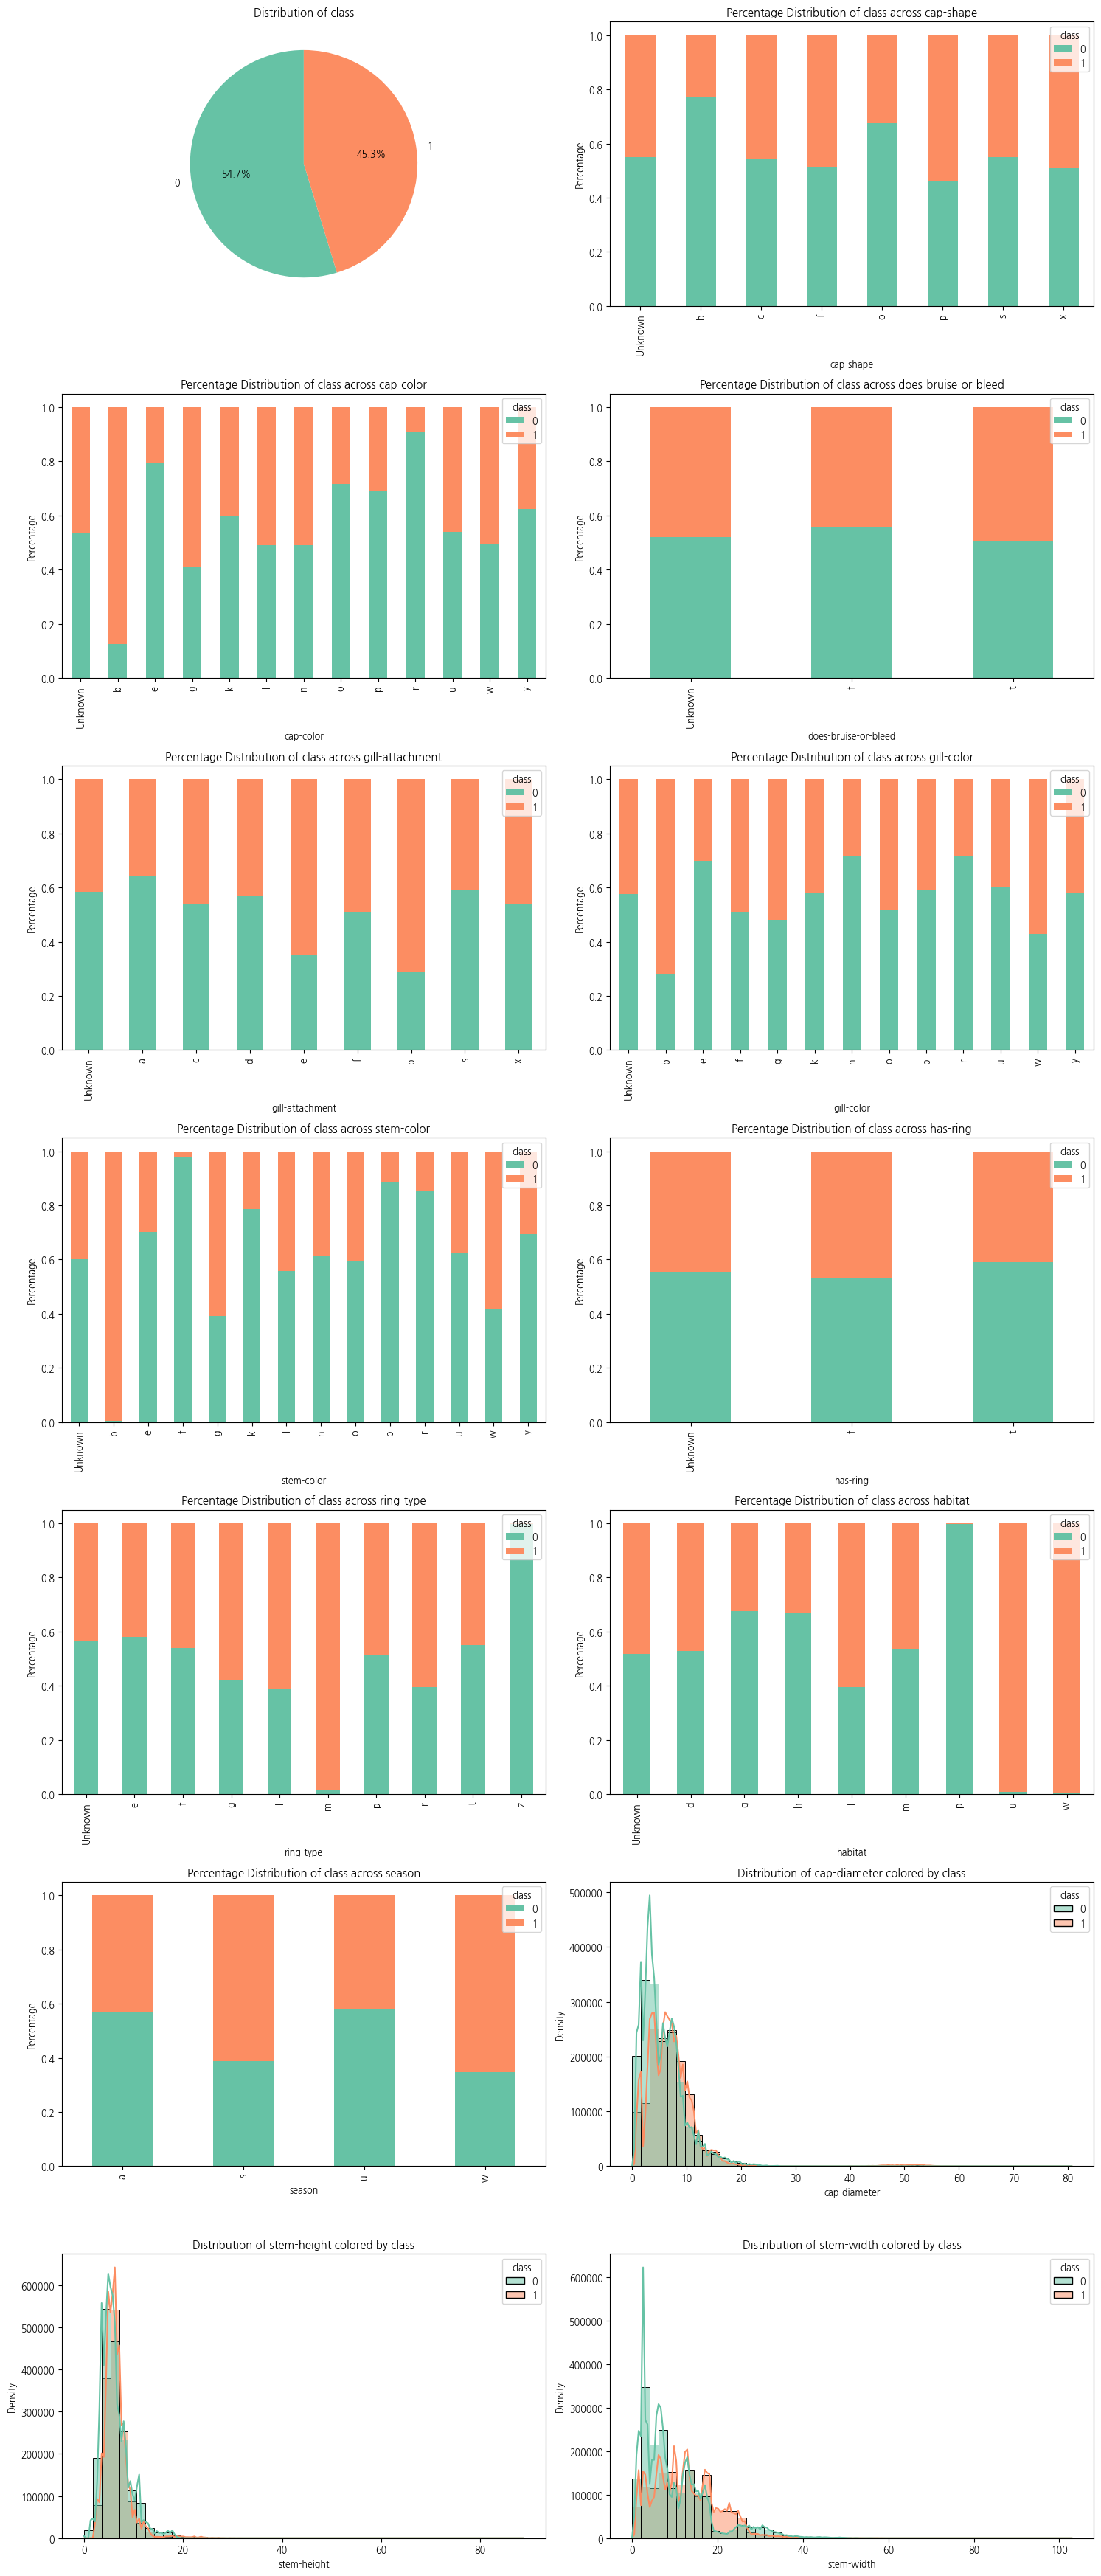

In [ ]:
#plot

def plot_feature_distributions(data, target):
    # 범주형 컬럼
    cat_cols = summary[summary['데이터 종류']=='범주형'].피처
    # 연속형 컬럼
    num_cols = summary[summary['데이터 종류']=='연속형'].피처

    # 서브플롯 개수: 범주형, 수치형 컬럼 수에 타겟 변수의 파이 차트 포함 (+1)
    total_plots = len(cat_cols) + len(num_cols) + 1  # +1은 파이 차트용
    n_cols = 2
    n_rows = int(np.ceil(total_plots / n_cols))

    # 전체 Figure 생성 및 서브플롯 배치
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()

    # 타겟 변수에 대한 파이 차트 그리기
    target_counts = data[target].value_counts(normalize=True)
    axes[0].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90)
    axes[0].set_title(f"Distribution of {target}")

    # 범주형 열들에 대한 분포 그래프
    for idx, col in enumerate(cat_cols):
        contingency_table = pd.crosstab(data[col], data[target], normalize='index')
        contingency_table.plot(kind="bar", stacked=True, color=['#66c2a5', '#fc8d62'], ax=axes[idx+1]) # +1은 파이 차트 자리 보정
        axes[idx+1].set_title(f"Percentage Distribution of {target} across {col}")
        axes[idx+1].set_xlabel(col)
        axes[idx+1].set_ylabel("Percentage")
        axes[idx+1].legend(title=target, loc='upper right')

     # 연속형 열들에 대한 분포 그래프
    for idx, col in enumerate(num_cols, start=len(cat_cols) + 1):  # +1은 파이 차트 자리 보정
         # 왜도가 큰지 확인하고, 해당하는 경우 bin 조절
        if data[col].dtype != 'O' and skew(data[col]) > 0.75:
            sns.histplot(data=data, x=col, hue=target, kde=True, ax=axes[idx], palette=['#66c2a5', '#fc8d62'], bins=50, kde_kws={'bw_adjust': 0.5})
        else:
            sns.histplot(data=data, x=col, hue=target, kde=True, ax=axes[idx], palette=['#66c2a5', '#fc8d62'], bins='auto', kde_kws={'bw_adjust': 0.5})

        axes[idx].set_title(f"Distribution of {col} colored by {target}")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("Density")

    # 서브플롯이 홀수 개일 경우, 빈 플롯 제거
    for i in range(total_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_feature_distributions(train, 'class')

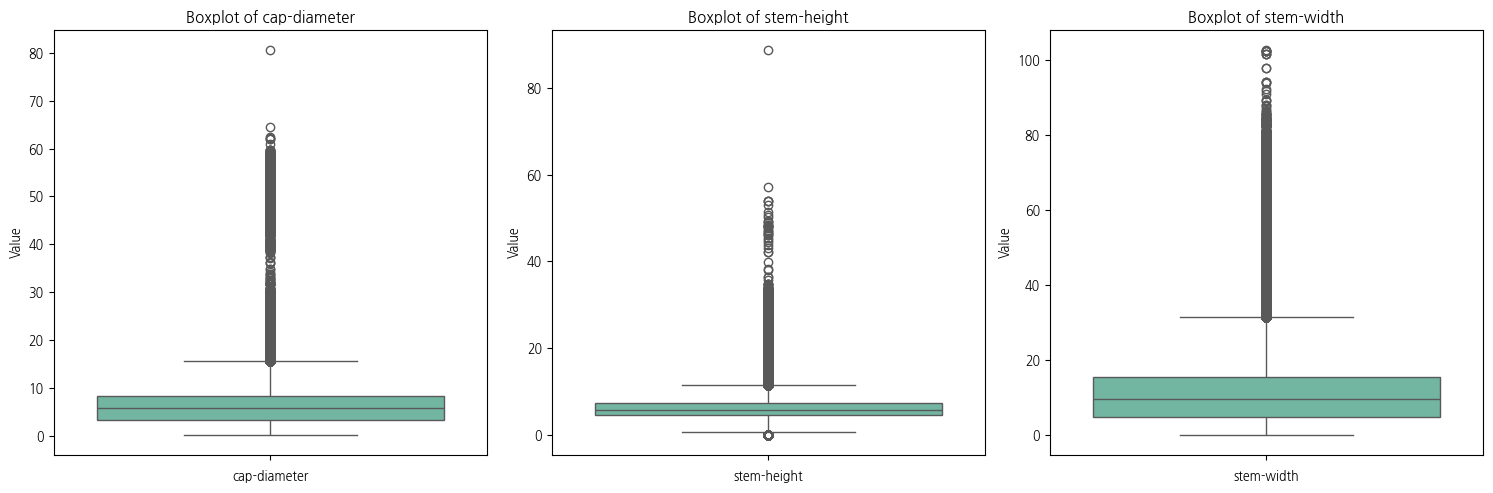

In [ ]:
#outlier

# Define the number of columns per row in the subplot grid
n_cols = 3

# Filter columns with more than two unique values and handle null values
filtered_cols = [col for col in train.select_dtypes(include=[np.number]).columns if train[col].nunique() > 2]

# Calculate the number of rows needed
n_rows = (len(filtered_cols) + n_cols - 1) // n_cols

# Create a figure and axes with the calculated number of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Loop through each filtered column and create a boxplot
for i, col in enumerate(filtered_cols):
    sns.boxplot(y=train[col].dropna(), ax=axes[i], palette=['#66c2a5'])  # Drop null values for plotting
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

# Remove any extra empty subplots if the number of columns doesn't divide evenly
for j in range(len(filtered_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

labelencoding

In [ ]:
def encode_features(df, label_encoders=None):
    if label_encoders is None:
        label_encoders = {}

    categorical_features = df.select_dtypes(include=['object']).columns
    for column in categorical_features:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

train, label_encoders = encode_features(train)

test, _ = encode_features(test, label_encoders)

In [ ]:
train.shape,test.shape

((3116945, 14), (2077964, 13))

In [ ]:
train.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,8.80,3,10,1,1,11,4.51,15.39,12,1,2,1,0
1,0,4.51,7,7,1,1,6,4.79,6.48,8,2,9,1,3
2,1,6.94,3,1,1,8,11,6.85,9.93,7,1,2,4,3
3,1,3.88,3,3,1,7,4,4.16,6.53,12,1,2,1,2
4,1,5.85,7,11,1,3,11,3.37,8.36,12,1,2,2,0


##하이퍼파라미터 최적화

데이터셋 준비

In [ ]:
from sklearn.model_selection import train_test_split

# 독립 변수 (X)와 종속 변수 (y) 분리
X = train.drop('class', axis=1)
y = train['class']

# 데이터셋을 학습 데이터와 검증 데이터로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install scikit-optimize

In [ ]:
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from lightgbm import LGBMClassifier
from scipy.stats import loguniform

# 모델 선택
model = LGBMClassifier(random_state=42,verbose=-1)

# 하이퍼파라미터 탐색 공간 정의
param_space = {
    'n_estimators': Integer(100, 500),             # 트리 개수
    'learning_rate': Real(0.01, 0.1, prior='log-uniform'),  # 학습률
    'max_depth': Integer(3, 8),                      # 최대 깊이
    'num_leaves': Integer(31, 63),                   # 리프 노드의 최대 개수
    'min_child_samples': Integer(5, 50),
    'subsample': Real(0.6, 1.0),                     # 샘플링 비율
    'colsample_bytree': Real(0.6, 1.0),              # 특성 샘플링 비율
    'random_state': [42],                            # 고정값으로 설정
}

# 베이지안 최적화를 사용한 하이퍼파라미터 탐색
opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=20,  # 탐색 반복 횟수
    cv=5,  # 교차 검증 폴드 수
    scoring='accuracy',  # 평가 지표
    random_state=42,
    verbose=1
)

# 베이지안 최적화 수행
opt.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", opt.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

KeyboardInterrupt: 

##모델 훈련 및 성능 검증

In [ ]:
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV

# 최적 하이퍼파라미터로 모델 훈련 및 성능 검증
best_model = LGBMClassifier(opt.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# 검증 데이터셋으로 성능 평가
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on validation set:", accuracy)

# 테스트 데이터셋으로 예측
test_prediction = best_model.predict(test)

혼동행렬

In [ ]:
print('Classification Report:')
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)

class_names = np.unique(y)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##예측 및 결과 제출

In [ ]:
from sklearn.metrics import matthews_corrcoef

score = matthews_corrcoef(y_val, y_pred)
print('MCC:', score)

In [ ]:
submission['class']=test_prediction
submission['id']=test_id
submission['class']=submission['class'].map({1:'e',0:'p'})
submission.to_csv('predd.csv',index=False)

# 결과 정리 및 제출